In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read Data

In [2]:
data = pd.read_csv("multirun_results.csv")
data.shape

(380, 6)

## 2. Print Basic Info

In [3]:
ratios = data['ratio'].unique()
print(f"Number of unique influence ratios: {len(ratios)}")
print("Unique influence ratios:", ratios)

seeds = data['seed'].unique()
print(f"Number of unique seeds: {len(seeds)}")

Number of unique influence ratios: 38
Unique influence ratios: [ 0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6
  0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.1   1.2   1.3   1.4
  1.5   1.6   1.7   1.8   1.9   2.    3.    4.    5.    6.    7.    8.
  9.   10.  ]
Number of unique seeds: 10


## 3. Compute Controller Performance Metric

In [4]:
data["ave_opinion_diff"] = data["opinion_state_avg"] - data["steady_state"]
data.head()

,ratio,seed,opinion_state_avg,opinion_state_var,steady_state,final_kalman_err,ave_opinion_diff
0,0.05,1,0.528205,4.755572e-07,0.528314,0.890234,-0.000109
1,0.05,2,-0.484661,4.675164e-03,-0.526625,0.955028,0.041964
2,0.05,3,-0.173521,2.099307e-05,-0.175015,1.157932,0.001494
3,0.05,4,0.476549,5.070260e-05,0.481617,1.102541,-0.005068
4,0.05,5,-0.329296,3.000939e-06,-0.329519,0.943384,0.000222


## 4. Boxplot of Performance Across Ratios

C:\Users\micha\AppData\Local\Temp\ipykernel_49920\1141540272.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


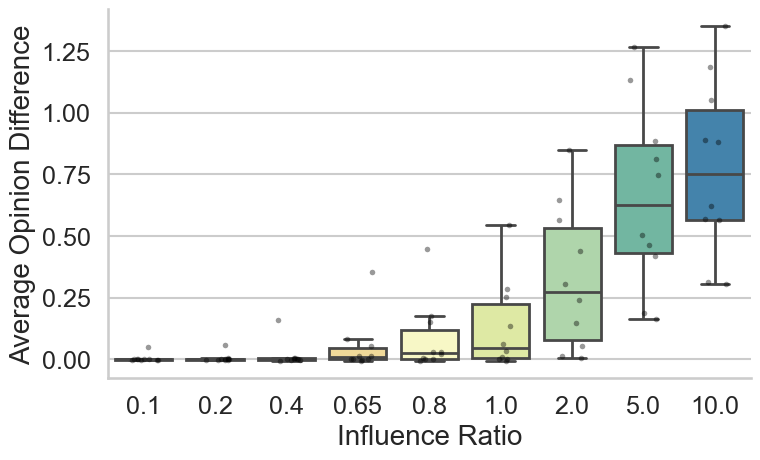

In [5]:
ratios_to_plot = [0.1, 0.2, 0.4, 0.65, 0.8, 1.0, 2.0, 5.0, 10.0]

# # boxplot of performance across ratios
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='ratio', y='ave_opinion_diff', data=data[data['ratio'].isin(ratios_to_plot)])
# # sns.boxplot(x='ratio', y='ave_opinion_diff', data=data)
# plt.title('Controller Performance Across Influence Ratios')
# plt.xlabel('Influence Ratio')
# plt.ylabel('Average Opinion Difference')
# plt.tight_layout()
# plt.show()

filtered_data = data[data['ratio'].isin(ratios_to_plot)]

# Set a modern seaborn style
sns.set_theme(style='whitegrid', context='talk', font_scale=1.1)

# Choose a sleek color palette
palette = sns.color_palette("Spectral", len(ratios_to_plot))

plt.figure(figsize=(8, 5))

# Draw the boxplot with some style
sns.boxplot(
    x='ratio', 
    y='ave_opinion_diff', 
    data=filtered_data, 
    palette=palette,
    linewidth=2.0,
    fliersize=0  # Hide outliers from boxplot (optional)
)

# Overlay with stripplot to show actual data points
sns.stripplot(
    x='ratio',
    y='ave_opinion_diff',
    data=filtered_data,
    color='black',
    size=4,
    jitter=0.2,
    alpha=0.4
)

# Labels and title with better typography
# plt.title('Controller Performance Across Influence Ratios', fontsize=24, weight='bold')
plt.xlabel('Influence Ratio', fontsize=20)
plt.ylabel('Average Opinion Difference', fontsize=20)

# Optional: remove top and right spines
sns.despine()

plt.tight_layout()
plt.savefig("controller_performance.pdf", format='pdf', bbox_inches='tight')
plt.show()

## 5. Line Plot with Standard Deviation

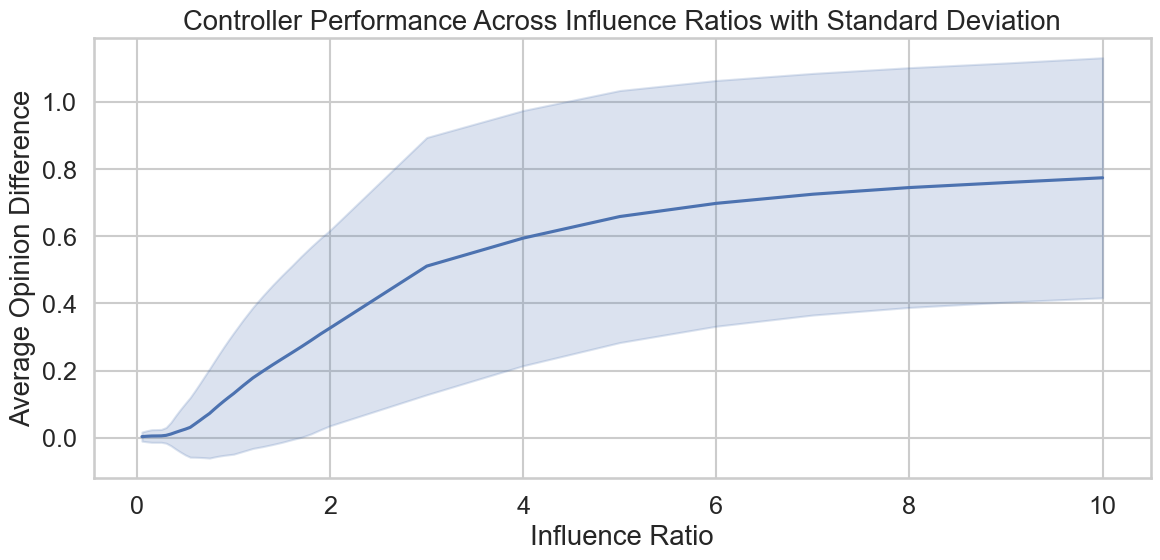

In [6]:
# linear plot with standard deviation
plt.figure(figsize=(12, 6))
sns.lineplot(x='ratio', y='ave_opinion_diff', data=data, errorbar='sd')
plt.title('Controller Performance Across Influence Ratios with Standard Deviation')
plt.xlabel('Influence Ratio')
plt.ylabel('Average Opinion Difference')
plt.tight_layout()
plt.show()